In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

from aux import get_idx
from disp import set_font_size

DT = .001
DX = .001

T_MAX = 3
X_MAX = 3

In [2]:
# symmetric landscape
u_on = 1
u_off = 0.

w_inh = -.5
w_exc = .5

v0_base = 1.
v0_slw = .5
v0_fst = 1.5

wdw_u_on = (.5, 1.)
wdw_u_off = (0, .5)

wdw_w_inh = (-.25, .25)
wdw_w_exc = (.25, .75)

wdw_v0_base = (0, .5)
wdw_v0_slw = (.5, .75)
wdw_v0_fst = (.75, 1.)

xpl_c = ['gray', 'gray', 'k', 'k', 'k', 'k', 'k', 'k', 'k']
xpl_lw = [2, 2, 2, 2, 5, 2, 2, 2, 2]

save_abcd = '2abcd.svg'
save_xpls = '2e.svg'
save_crtn = '2i_part1.svg'
save_dy_dt_xpl = True
save_dy_dt_t_avg = '2l_part1.svg'

In [3]:
def get_u(t):
    
    tmp_a = (wdw_u_on[0] <= t%1) * (t%1 < wdw_u_on[1])
    tmp_b = (wdw_u_on[0] <= t%1-1) * (t%1-1 < wdw_u_on[1])
    
    return u_on * (tmp_a + tmp_b)

def get_w(x):
    
    tmp_a = (wdw_w_inh[0] <= x%1) * (x%1 < wdw_w_inh[1])
    tmp_b = (wdw_w_inh[0] <= x%1-1) * (x%1-1 < wdw_w_inh[1])
    
    inh = w_inh * (tmp_a + tmp_b)
    
    tmp_a = (wdw_w_exc[0] <= x%1) * (x%1 < wdw_w_exc[1])
    tmp_b = (wdw_w_exc[0] <= x%1-1) * (x%1-1 < wdw_w_exc[1])
    
    exc = w_exc * (tmp_a + tmp_b)
    
    return inh + exc

def get_v0(x):
    
    tmp_a = (wdw_v0_base[0] <= x%1) * (x%1 < wdw_v0_base[1])
    tmp_b = (wdw_v0_base[0] <= x%1-1) * (x%1-1 < wdw_v0_base[1])
    
    base = v0_base * (tmp_a + tmp_b)
    
    tmp_a = (wdw_v0_slw[0] <= x%1) * (x%1 < wdw_v0_slw[1])
    tmp_b = (wdw_v0_slw[0] <= x%1-1) * (x%1-1 < wdw_v0_slw[1])
    
    slw = v0_slw * (tmp_a + tmp_b)

    tmp_a = (wdw_v0_fst[0] <= x%1) * (x%1 < wdw_v0_fst[1])
    tmp_b = (wdw_v0_fst[0] <= x%1-1) * (x%1-1 < wdw_v0_fst[1])
    
    fst = v0_fst * (tmp_a + tmp_b)
    
    return base + slw + fst

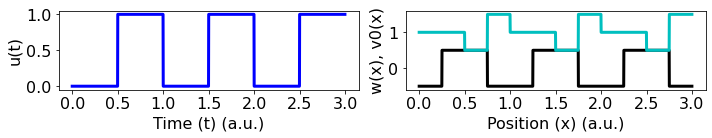

In [4]:
t = np.arange(0, T_MAX, DT)
x = np.arange(0, X_MAX, DX)
u = get_u(t)
w = get_w(x)
v0 = get_v0(x)

fig, axs = plt.subplots(1, 2, figsize=(10, 2), tight_layout=True)
axs[0].plot(t, u, lw=3, c='b')
axs[0].set_xlabel('Time (t) (a.u.)')
axs[0].set_ylabel('u(t)')

axs[1].plot(x, w, lw=3, c='k')
axs[1].plot(x, v0, lw=3, c='c')
axs[1].set_xlabel('Position (x) (a.u.)')
axs[1].set_ylabel('w(x), v0(x)')

set_font_size(axs, 16)

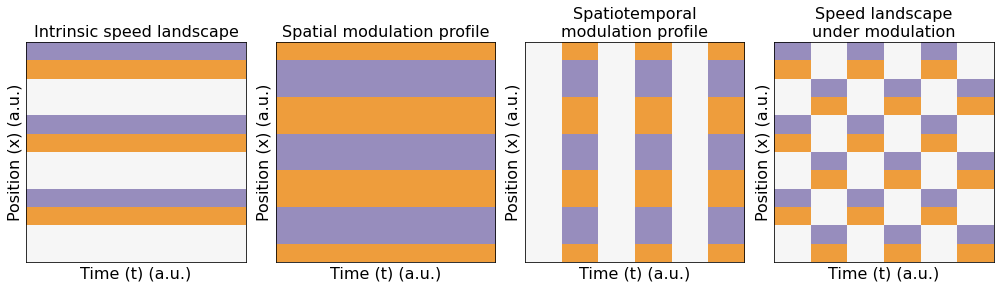

In [5]:
v0_mat = np.outer(np.ones(len(t)), v0)
w_mat = np.outer(np.ones(len(t)), w)
u_mat = np.outer(u, np.ones(len(x)))

uw = u_mat*w_mat

fig, axs = plt.subplots(1, 4, figsize=(14, 4), tight_layout=True)
axs[0].matshow(v0_mat.T, origin='lower', vmin=0, vmax=2, cmap='PuOr', extent=[0, T_MAX, 0, X_MAX])
axs[0].set_title('Intrinsic speed landscape')

axs[1].matshow(w_mat.T, origin='lower', vmin=-1, vmax=1, cmap='PuOr', extent=[0, T_MAX, 0, X_MAX])
axs[1].set_title('Spatial modulation profile')

axs[2].matshow(u_mat.T*w_mat.T, origin='lower', vmin=-1, vmax=1, cmap='PuOr', extent=[0, T_MAX, 0, X_MAX])
axs[2].set_title('Spatiotemporal\nmodulation profile')

axs[3].matshow(u_mat.T*w_mat.T + v0_mat.T, origin='lower', vmin=0, vmax=2, cmap='PuOr', extent=[0, T_MAX, 0, X_MAX])
axs[3].set_title('Speed landscape\nunder modulation')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.tick_bottom()
    ax.set_xlabel('Time (t) (a.u.)')
    ax.set_ylabel('Position (x) (a.u.)')
    
set_font_size(axs, 16)

if save_abcd:
    fig.savefig(f'ms/{save_abcd}')

In [6]:
# funcs for getting nearest value
def u_near(t_):
    return u[get_idx(t_, 0, DT, len(t))]

def w_near(x_):
    return w[get_idx(x_, 0, DX, len(x))]

def v0_near(x_):
    return v0[get_idx(x_, 0, DX, len(x))]

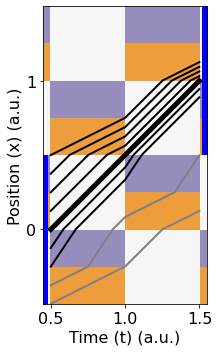

In [7]:
t_0 = .5
x_0s = [0, .125, .25, .375, .5, .625, .75, .875, 1.]

t_smln = np.arange(t_0, t_0 + 1, DT)
x_smlns = []

for x_0 in x_0s:
    x_smln = np.nan * np.zeros(t_smln.shape)
    x_smln[0] = x_0
    for ct, t_ in enumerate(t_smln[1:], 1):
        x_ = x_smln[ct-1]
        v = u_near(t_)*w_near(x_) + v0_near(x_)
        x_smln[ct] = x_ + DT*v
        
    x_smlns.append(x_smln)
    

fig, ax = plt.subplots(1, 1, figsize=(3.5, 5), tight_layout=True)
ax.matshow(u_mat.T*w_mat.T + v0_mat.T, origin='lower', vmin=0, vmax=2, cmap='PuOr', extent=[0, T_MAX, -.5, X_MAX-.5])

for cs, x_smln in enumerate(x_smlns):
    ax.plot(t_smln, x_smln - .5, c=xpl_c[cs], lw=xpl_lw[cs])
    
ax.fill_between([.45, .475], [-.5, -.5], [.5, .5], color='b')


ax.fill_between([1.52, 1.55], [.505, .505], [1.5, 1.5], color='b')

ax.xaxis.tick_bottom()
ax.set_xticks([.5, 1, 1.5])
ax.set_xlim(t_0-.05, t_0+1.05)
ax.set_ylim(-.5, x_0s[-1]+.5)

ax.set_xlabel('Time (t) (a.u.)')
ax.set_ylabel('Position (x) (a.u.)')

set_font_size(ax, 16)

fig.savefig(f'ms/{save_xpls}')

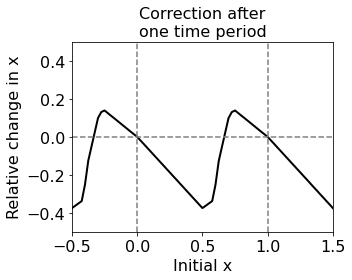

In [8]:
x_0s = np.arange(0, 2.025, .025)

t_smln = np.arange(t_0, t_0 + 1, DT)
x_ends = np.nan * np.zeros(len(x_0s))

for cx_0, x_0 in enumerate(x_0s):
    x_smln = np.nan * np.zeros(t_smln.shape)
    x_smln[0] = x_0
    for ct, t_ in enumerate(t_smln[1:], 1):
        x_ = x_smln[ct-1]
        v = u_near(t_)*w_near(x_) + v0_near(x_)
        x_smln[ct] = x_ + DT*v
        
    x_ends[cx_0] = x_smln[-1]
    
x_shifts = x_ends - x_0s - 1

fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.plot(x_0s - .5, x_shifts, c='k', lw=2)
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(1, ls='--', color='gray')

ax.set_xlim(-.5, 1.5)
ax.set_ylim(-.5, .5)

ax.set_xticks([-.5, 0, .5, 1, 1.5])

ax.set_xlabel('Initial x')
ax.set_ylabel('Relative change in x')

ax.set_title('Correction after\none time period')

set_font_size(ax, 16)

if save_crtn:
    fig.savefig(f'ms/{save_crtn}')

# Time-averaged dynamics in moving reference frame

$$y = x - t$$


$$\frac{dy}{dt} = \frac{dx}{dt} - 1$$

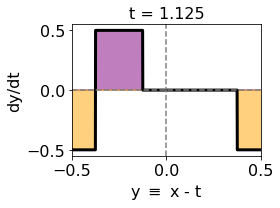

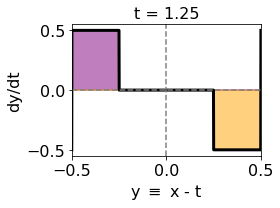

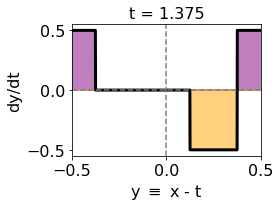

In [11]:
T_XPL = [1.125, 1.25, 1.375, 1.5, 1.625]
LBL = ['2i.svg', '2j.svg', '2k.svg']
RY = np.arange(-1, 1, DX)

for t_xpl, lbl in zip(T_XPL, LBL):
    x_0 = t_xpl
    rx = x_0 + RY
    
    dx_dt = get_u(t_xpl)*get_w(rx) + get_v0(rx)
    dy_dt = dx_dt - 1
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
    ax.plot(RY, dy_dt, c='k', lw=3)
    
    ax.fill_between(RY, np.zeros(len(rx)), .5*(dy_dt > 0), color='purple', alpha=.5)
    ax.fill_between(RY, -.5*(dy_dt < 0), np.zeros(len(rx)), color='orange', alpha=.5)
    
    ax.axhline(0, ls='--', c='gray')
    ax.axvline(0, ls='--', c='gray')
    
    ax.set_xlim(-.5, .5)
    ax.set_xticks([-.5, 0, .5])
    ax.set_yticks([-.5, 0, .5])
    
    ax.set_title(f't = {t_xpl}')
    ax.set_xlabel('y $\equiv$ x - t')
    ax.set_ylabel('dy/dt')
    
    set_font_size(ax, 16)
    
    if save_dy_dt_xpl:
        fig.savefig(os.path.join('ms', lbl))

In [12]:
T_DY_DT = np.arange(.5, 2.5, DT)
RY = np.arange(-1, 1, DX)

dy_dt = np.nan * np.zeros((len(T_DY_DT), len(RY)))

for ct_, t_ in enumerate(T_DY_DT):
    x_0 = t_
    rx = x_0 + RY
    
    v = get_u(t_)*get_w(rx) + get_v0(rx)
    
    dy_dt[ct_, :] = v - 1

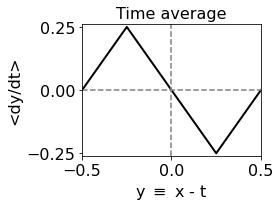

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
ax.plot(RY, dy_dt.mean(0), lw=2, c='k')

ax.axhline(0, ls='--', c='gray')
ax.axvline(0, ls='--', c='gray')

ax.set_xlim(-.5, .5)
ax.set_ylim(-.26, .26)
ax.set_xticks([-.5, 0, .5])
ax.set_yticks([-.25, 0, .25])

ax.set_title('Time average')
ax.set_xlabel('y $\equiv$ x - t')
ax.set_ylabel('<dy/dt>')

set_font_size(ax, 16)

if save_dy_dt_t_avg:
    fig.savefig(os.path.join('ms', save_dy_dt_t_avg))